# Projet

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

In [343]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [344]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

### Analyse de la structure du dataframe

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [346]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [347]:
df.apply(lambda x: len(x.unique()))

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

#### Split de la colonne datetime en year, month, day, time afin de pouvoir analyser les variables indépendamment

In [348]:
df["datetime"] = pd.to_datetime(df["datetime"])
df['year'] = df["datetime"].dt.year
df['month'] = df["datetime"].dt.month
df['day'] = df["datetime"].dt.day
df['hour'] = df["datetime"].dt.hour
df = df.drop(columns=["datetime"])

In [349]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count          year         month           day          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean     191.574132   2011.501929      6.521495      9.992559     11.541613  
std      181.144454      0.500019      3.444373      5.476608      6.915838  
min        1.000000   2011.000000      1.000000      1.000000      0.000000  
25%       42.000000   2011.000000      4.000000      5.000000      6.000000  
50%      145.000000   2012.000000      7.000000     10.000000     12.000000  
75%      284.000000   2012.000000     10.000000     15.000000     18.000000  
max      977.000000   2012.000000     12.000000     19.000000     23.000000

In [350]:
df.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    1     0  
1       8          32     40  2011      1    1     1  
2       5          27     32  2011      1    1     2  
3       3          10     13  2011      1    1     3  
4       0           1      1  2011      1    1     4

### Ajout de quelques graphiques

##### Analyse de la distribution de la cible afin de repérer la part des outliers

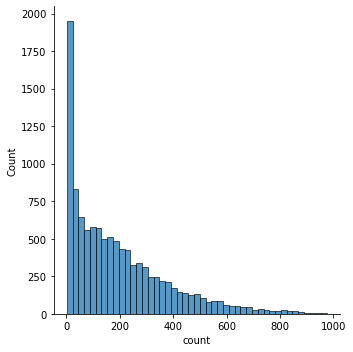

In [351]:
sns.displot(df["count"])

<AxesSubplot:xlabel='count'>

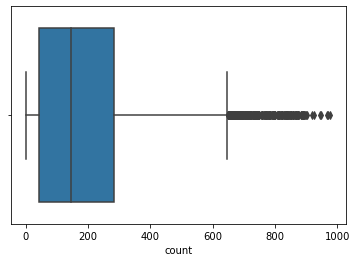

In [352]:
sns.boxplot(x=df["count"])

##### Analyse des autres variables

[Text(0.5, 1.0, 'Nombre de vélos loués toutes les heures, on note un pic à 8h et 18h')]

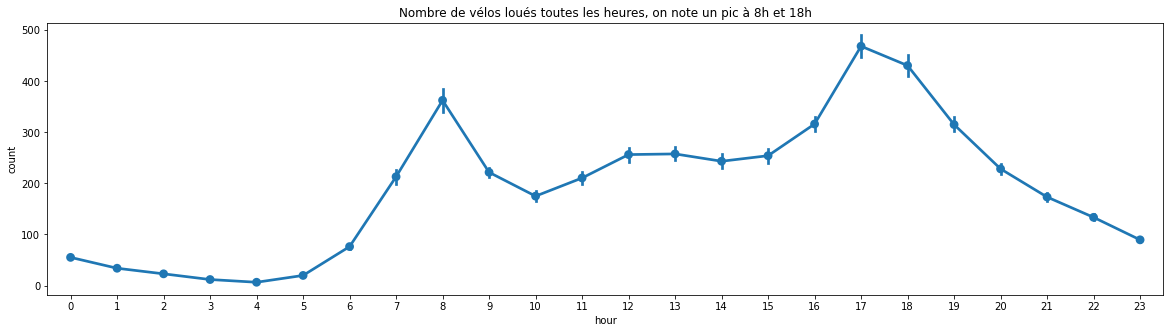

In [353]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', ax=ax)
ax.set(title='Nombre de vélos loués toutes les heures, on note un pic à 8h et 18h')

[Text(0.5, 1.0, 'Total par heure des vélos loués en fonction des mois, les vélos sont plus loués les mois d été')]

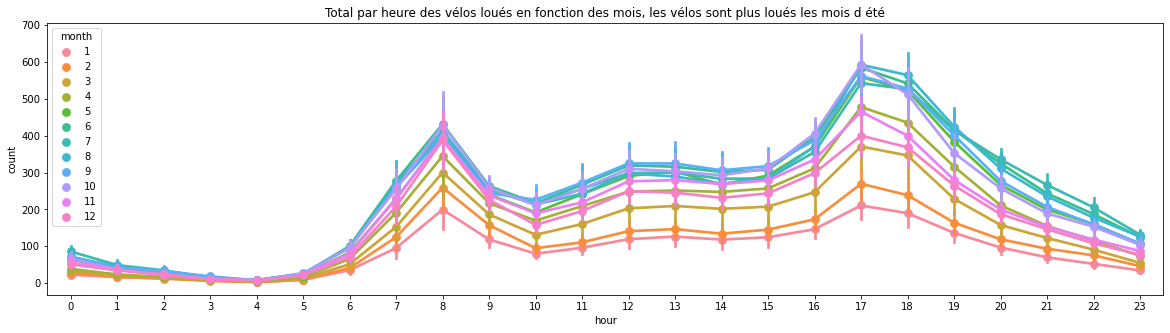

In [354]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='month', ax=ax)
ax.set(title='Total par heure des vélos loués en fonction des mois, les vélos sont plus loués les mois d été')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des différents temps')]

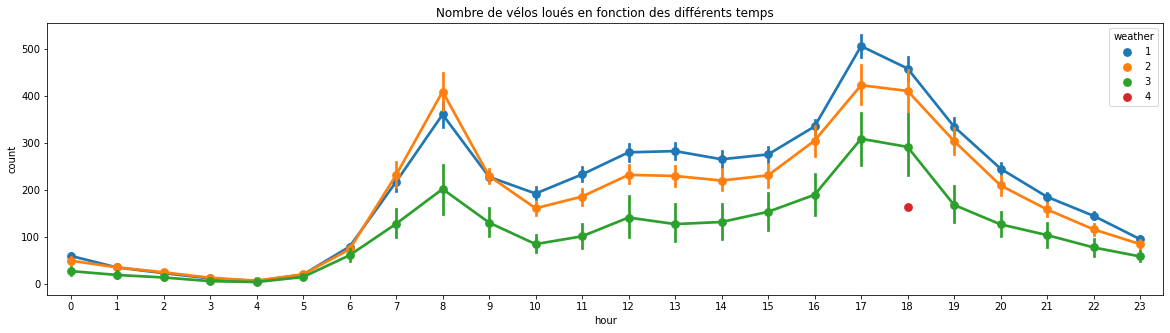

In [355]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Nombre de vélos loués en fonction des différents temps')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des différentes saisons')]

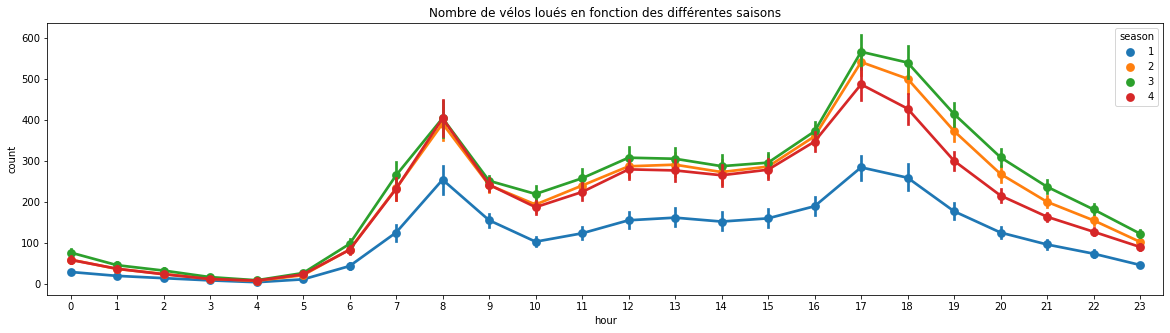

In [356]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Nombre de vélos loués en fonction des différentes saisons')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des saisons')]

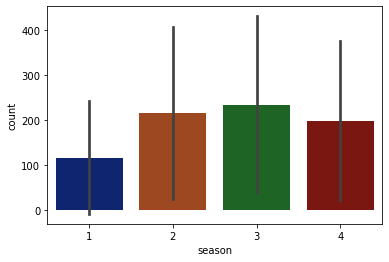

In [357]:
sns.barplot(data=df, x='season', y='count', ci="sd", palette="dark")
ax.set(title='Nombre de vélos loués en fonction des saisons')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des temps')]

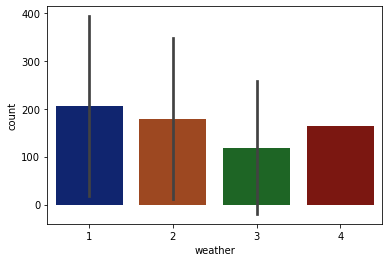

In [358]:
sns.barplot(data=df, x='weather', y='count', ci="sd", palette="dark")
ax.set(title='Nombre de vélos loués en fonction des temps')

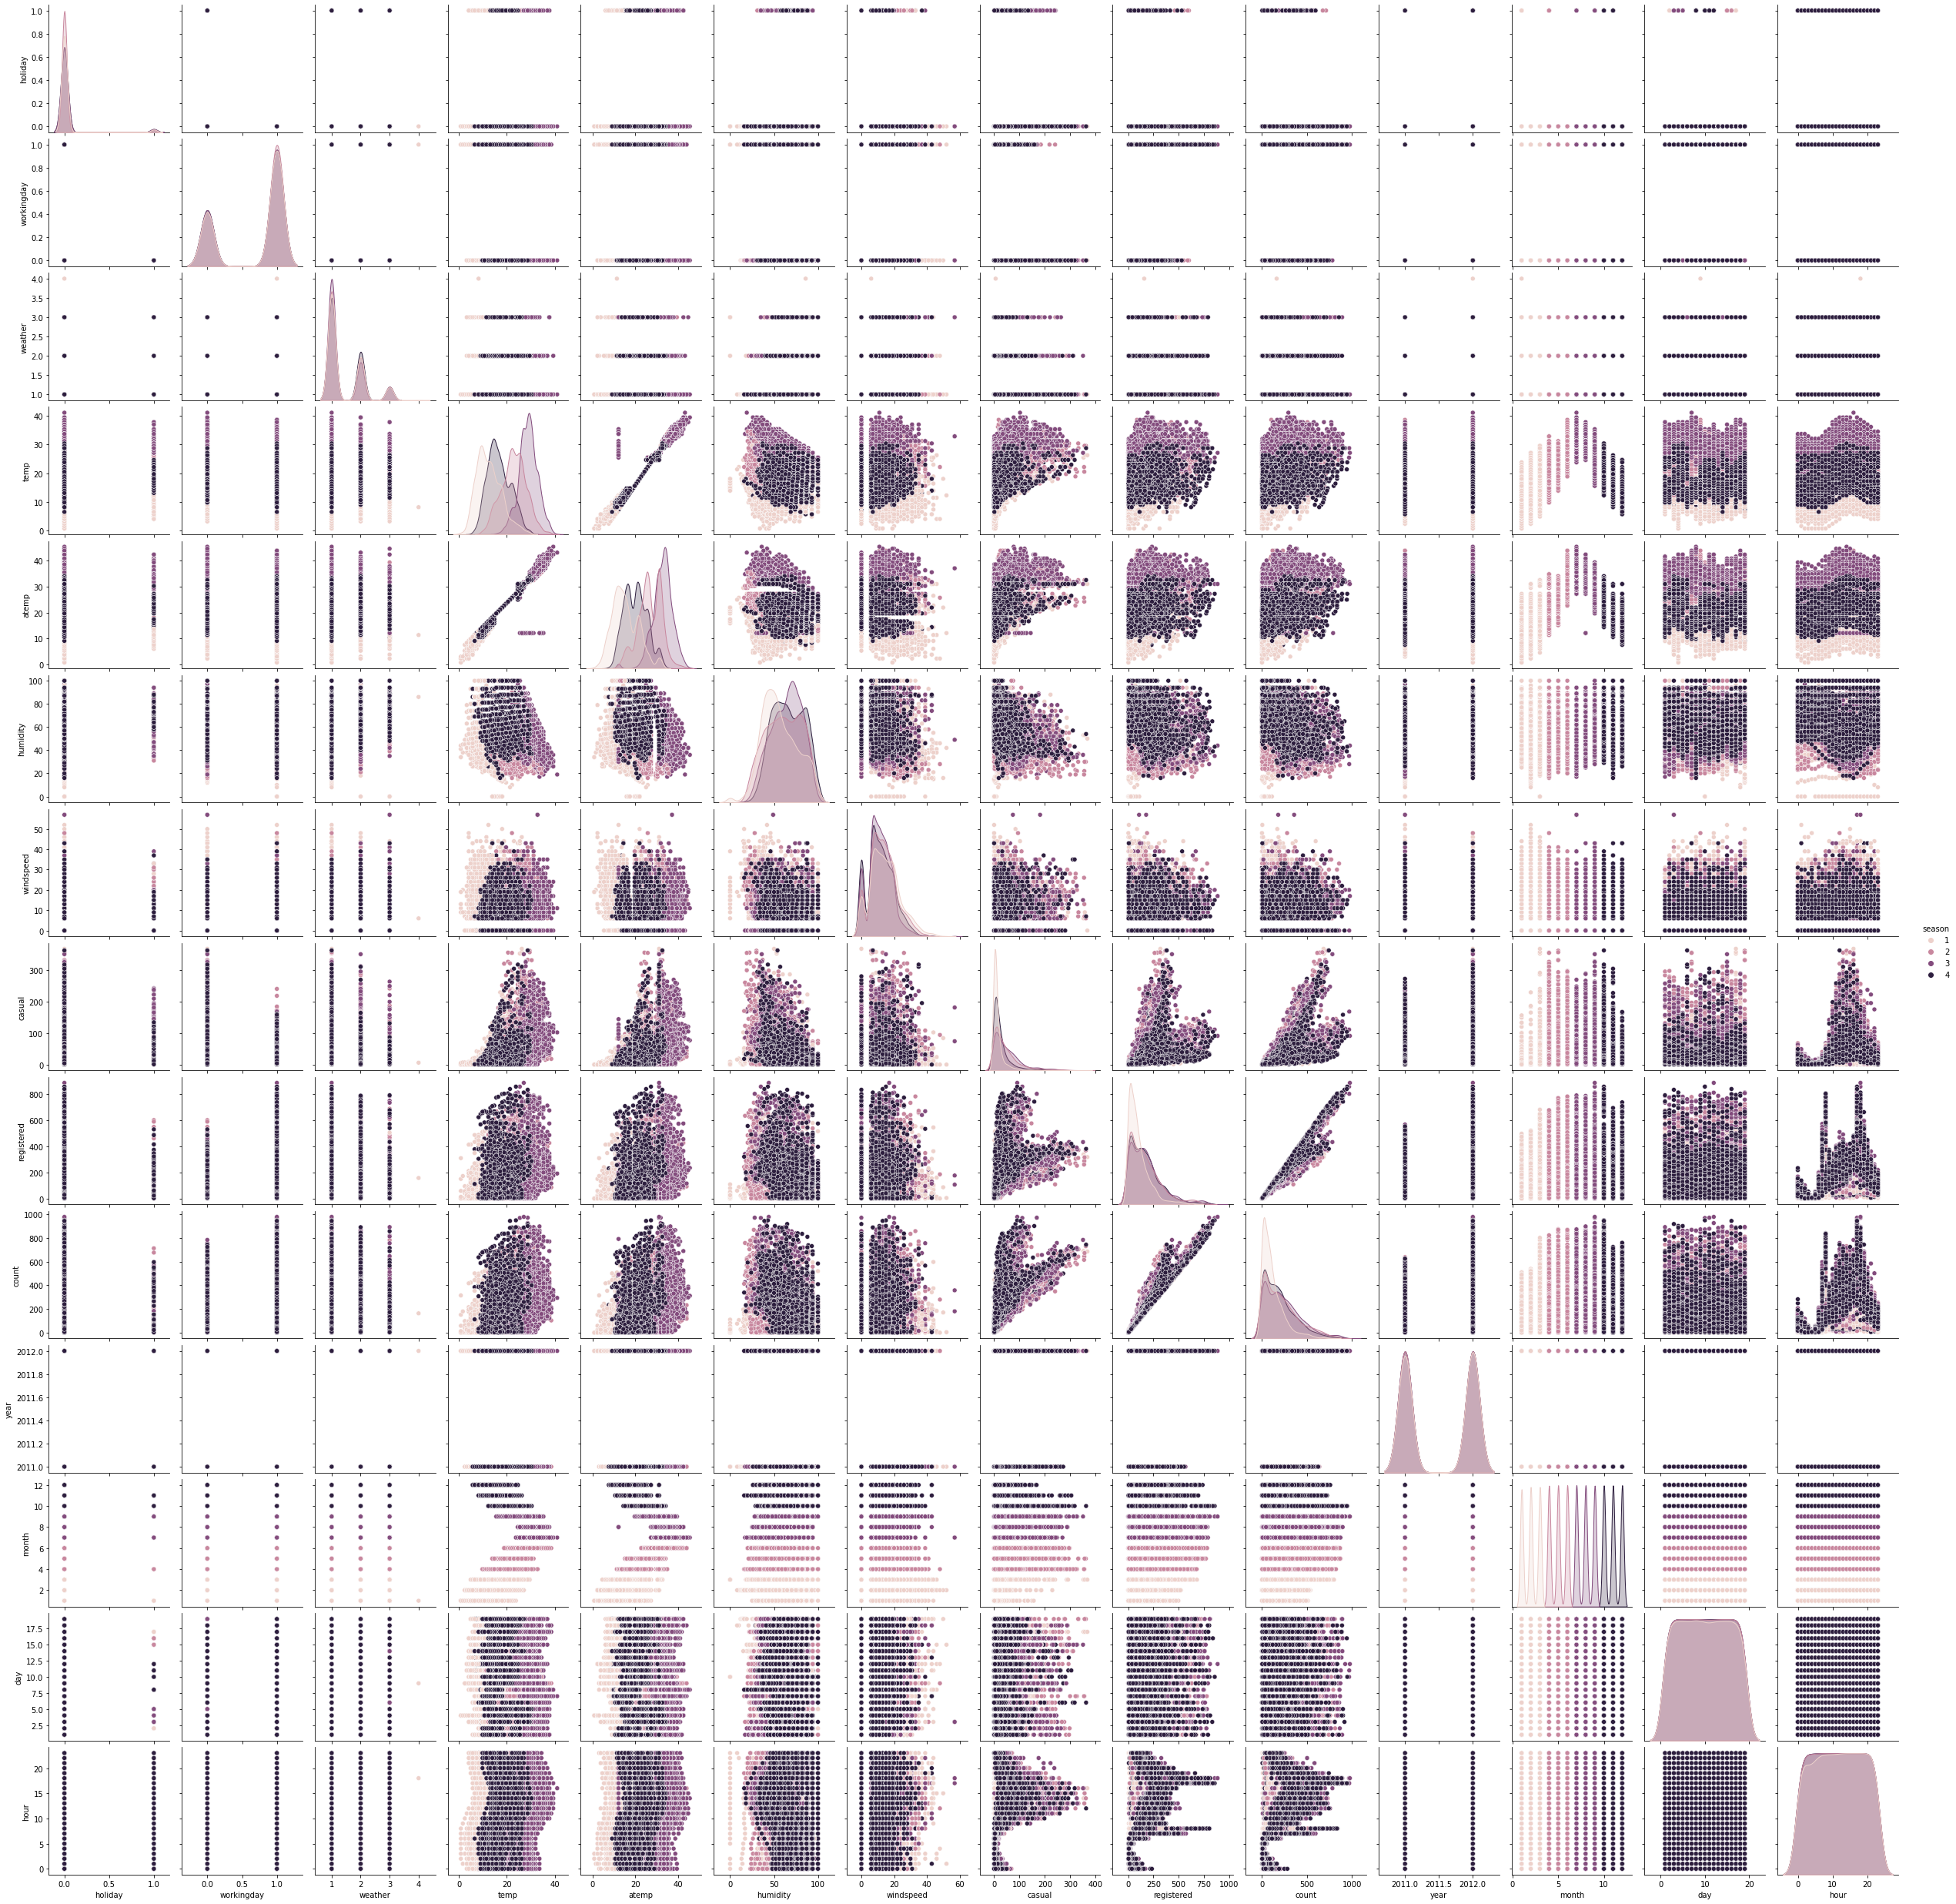

In [359]:
sns.pairplot(df, hue="season")

##### Analyse des corrélations afin de voir s'il faudra réduire le nombre de dimension

<AxesSubplot:>

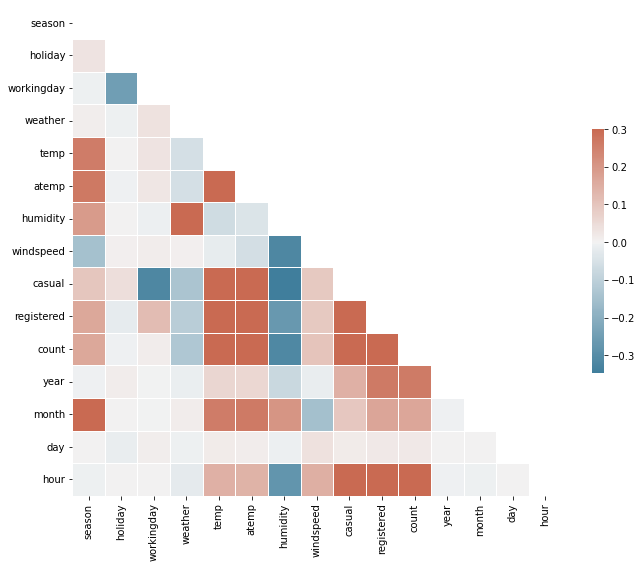

In [360]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Les colonnes atemp / temp sont fortement positivement corrélées et les colonnes workingday / holiday sont fortement négativement corrélées, je décide donc de supprimer les colonnes atemp et holiday. La colonne cible count correspond à la somme des colonnes registered et casual, je décide donc également de ne pas concerver ces colonnes 

In [361]:
df = df.drop(columns=["atemp", "holiday", "casual", "registered"])

##### Dans le premier graphique, nous observons des outliers, nous allons les supprimer grâce à la médiane et l'écart interquartile

Shape initiale: (10886, 11)
Shape après avoir supprimer les outliers: (10886, 11)


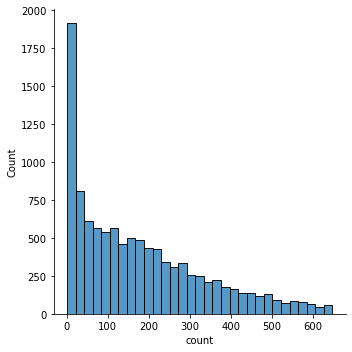

In [362]:
print("Shape initiale: {}".format(df.shape))
q1 = df["count"].quantile(0.25)
q3 = df["count"].quantile(0.75)
iqr = q3 - q1
df_preprocessed = df.loc[(df["count"] >=  q1 -(1.5 * iqr) ) & (df["count"] <= q3 +(1.5 * iqr) )]
print("Shape après avoir supprimer les outliers: {}".format(df.shape))
sns.displot(df_preprocessed["count"])

In [363]:
df_preprocessed.describe()

season    workingday       weather          temp      humidity  \
count  10586.000000  10586.000000  10586.000000  10586.000000  10586.000000   
mean       2.498489      0.676459      1.422539     20.061494     62.165124   
std        1.121629      0.467849      0.636549      7.781496     19.231315   
min        1.000000      0.000000      1.000000      0.820000      0.000000   
25%        1.000000      0.000000      1.000000     13.940000     47.000000   
50%        2.000000      1.000000      1.000000     20.500000     62.000000   
75%        4.000000      1.000000      2.000000     26.240000     78.000000   
max        4.000000      1.000000      4.000000     41.000000    100.000000   

          windspeed         count          year         month           day  \
count  10586.000000  10586.000000  10586.000000  10586.000000  10586.000000   
mean      12.776699    175.717079   2011.487814      6.494804      9.977045   
std        8.173430    156.360023      0.499875      3.464977      5.475961   
min        0.000000      1.000000   2011.000000      1.000000      1.000000   
25%        7.001500     40.000000   2011.000000      3.000000      5.000000   
50%       12.998000    138.000000   2011.000000      6.000000     10.000000   
75%       16.997900    270.000000   2012.000000     10.000000     15.000000   
max       56.996900    647.000000   2012.000000     12.000000     19.000000   

               hour  
count  10586.000000  
mean      11.456641  
std        6.960409  
min        0.000000  
25%        5.000000  
50%       11.000000  
75%       18.000000  
max       23.000000

### Préparation du dataset pour mettre en place les algorithmes

In [364]:
from prettytable import PrettyTable
import xgboost as xgb

# Sklearn metrics for regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sklearn regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

#### Analyse des valeurs nulles, il n'y aucune valeur nulle dans le jeu de données, aucune imputation n'est nécessaire

In [365]:
df_with_dummies.isna().sum()

temp         0
humidity     0
windspeed    0
count        0
weather_2    0
            ..
hour_19      0
hour_20      0
hour_21      0
hour_22      0
hour_23      0
Length: 64, dtype: int64

#### Séparation du dataframe en train et test

In [366]:
y = df_preprocessed["count"]
x = df_preprocessed.drop(columns=["count"])

In [367]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.20, random_state = 2)

#### Comparaison de plusieurs algorithmes et choix des modèles

Le dataset a les charactérisques suivantes : 
- La variable cible est quantitative : je ne vais tester que des modèles de régression 
- Le jeu de données n'est pas très lourd
- Seules quelques features sont importantes comme nous avons pu le voir dans la matrice de corrélation, beaucoup sont corrélées 

In [368]:
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    xgb.XGBRegressor(verbosity=0),
    RandomForestRegressor(random_state=0, n_estimators=300)
]

for model in models:
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    table.add_row([type(model).__name__, format(mse, '.2f'), format(r2, '.2f')])

In [369]:
table

+---------------------------+--------------------+----------+
|           Model           | Mean Squared Error | R² score |
+---------------------------+--------------------+----------+
|      LinearRegression     |      14917.72      |   0.40   |
|   DecisionTreeRegressor   |      3538.95       |   0.86   |
| GradientBoostingRegressor |      4190.64       |   0.83   |
|        XGBRegressor       |      1577.81       |   0.94   |
|   RandomForestRegressor   |      1802.36       |   0.93   |
+---------------------------+--------------------+----------+

### Random Forest
Comme nous le voyons dans le tableau ci-dessus, le score R², qui évalue la performance du modèle est le plus élevé des modèles choisis, 89% de la variance de la variable count s’explique par les features. L'erreur quadratique moyenne est aussi la plus faible, cela correspond à la différence entre la prédiction et le réel.


In [370]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]
features = list(x.columns)

model = RandomForestRegressor(random_state=0, n_estimators=500).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

+-----------------------+------------+---------+-------+----------+-------+
|         Model         |  Dataset   |   MSE   |  RMSE | R² score |  MAE  |
+-----------------------+------------+---------+-------+----------+-------+
| RandomForestRegressor |  training  |  238.44 | 15.44 |   0.99   |  9.84 |
| RandomForestRegressor | validation | 1800.54 | 42.43 |   0.93   | 26.96 |
+-----------------------+------------+---------+-------+----------+-------+

Nous voyons que le modèle overfit, c'est le risque lorsqu'on utilise des modèles de random forest. Il n'est pas assez général, et "colle" trop aux données d'entrainement.

Feature ranking:
1. feature hour (0.631328)
2. feature temp (0.115829)
3. feature year (0.065672)
4. feature workingday (0.049372)
5. feature humidity (0.041458)
6. feature month (0.041134)
7. feature weather (0.018349)
8. feature day (0.015808)
9. feature windspeed (0.013419)
10. feature season (0.007631)


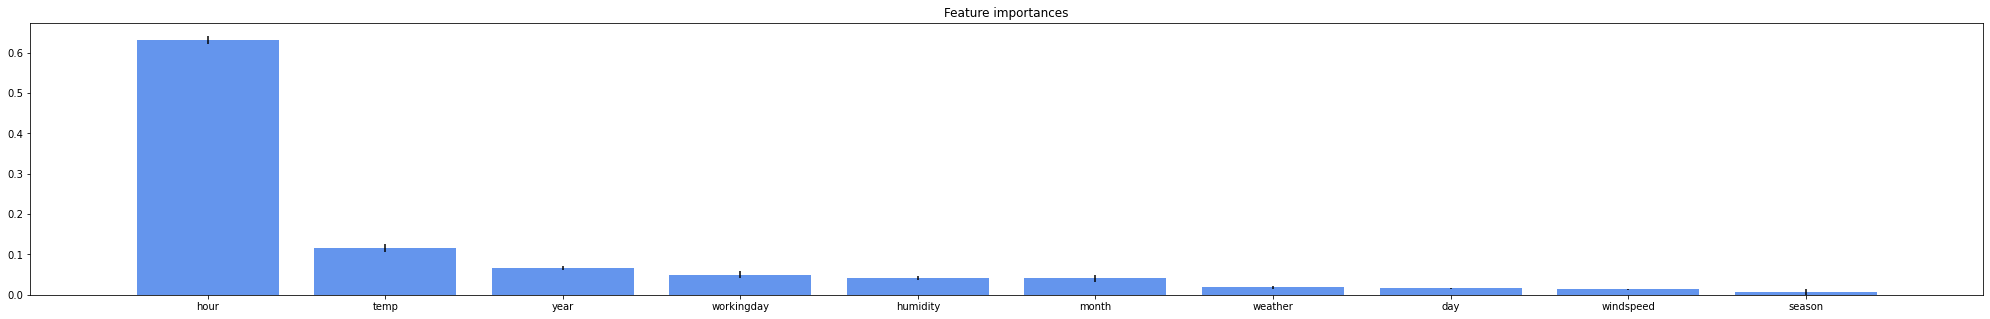

In [371]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

plt.figure(figsize=(35,5))
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_test.shape[1]])
plt.show()

### XGBRegressor

In [379]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]
features = list(x.columns)

model_xgb = xgb.XGBRegressor(verbosity=0).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model_xgb.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model_xgb.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

+-----------------------+------------+---------+-------+----------+-------+
|         Model         |  Dataset   |   MSE   |  RMSE | R² score |  MAE  |
+-----------------------+------------+---------+-------+----------+-------+
| RandomForestRegressor |  training  |  532.36 | 23.07 |   0.98   | 15.70 |
| RandomForestRegressor | validation | 1577.81 | 39.72 |   0.94   | 25.98 |
+-----------------------+------------+---------+-------+----------+-------+

### GradientBoostingRegressor

In [380]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01}

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]

model_gbr = GradientBoostingRegressor(**gbr_params).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model_gbr.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model_gbr.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model_gbr).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

+---------------------------+------------+---------+-------+----------+-------+
|           Model           |  Dataset   |   MSE   |  RMSE | R² score |  MAE  |
+---------------------------+------------+---------+-------+----------+-------+
| GradientBoostingRegressor |  training  | 3813.93 | 61.76 |   0.84   | 43.55 |
| GradientBoostingRegressor | validation | 4175.77 | 64.62 |   0.83   | 44.44 |
+---------------------------+------------+---------+-------+----------+-------+

Avec ce modèle, les résultats sur les données d'entraînement et de test sont assez similaires, cela signifie que le modèle est plus général, même si le score du modèle est moins élevé. Le modèle DecisionTreeRegressor a un score r2 plus élevé mais overfit les données d'entraînement.

Feature ranking:
1. feature hour (0.670275)
2. feature temp (0.093028)
3. feature year (0.073066)
4. feature workingday (0.070558)
5. feature month (0.044556)
6. feature humidity (0.025491)
7. feature weather (0.013368)
8. feature season (0.007939)
9. feature windspeed (0.001152)
10. feature day (0.000568)


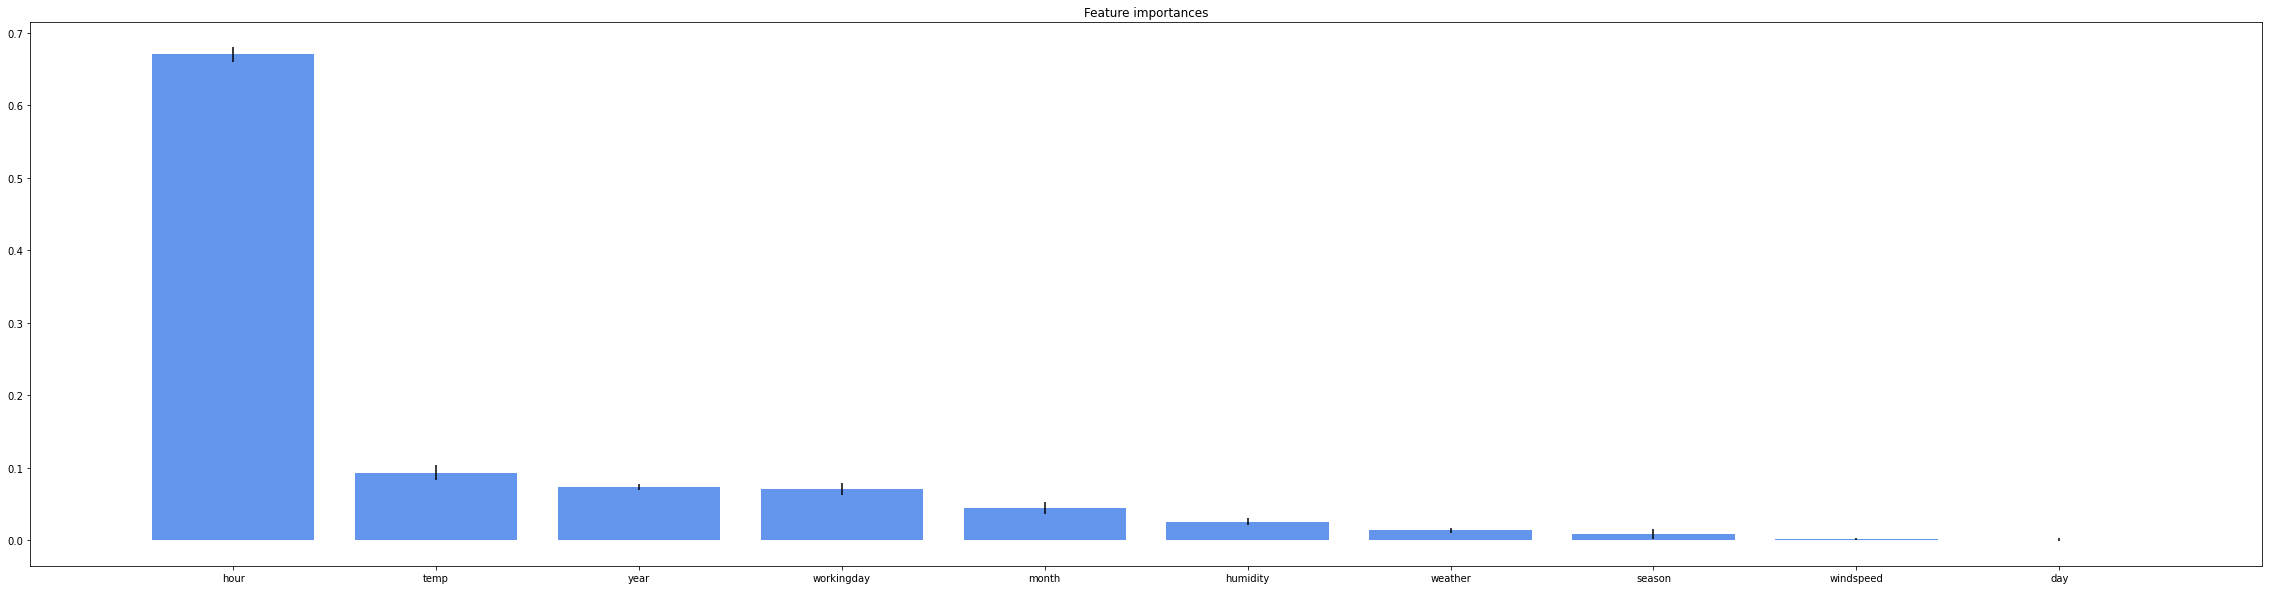

In [374]:
importances = model_gbr.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

plt.figure(figsize=(40,10))
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_test.shape[1]])
plt.show()

## Conclusion
Dans les deux modèles sélectionnés, les variables heure et temp sont celles ayant le plus d'importance dans le modèle, 30% des modèles sont expliqués par ces deux variables. 